In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.shape

(150, 5)

In [10]:
iris['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

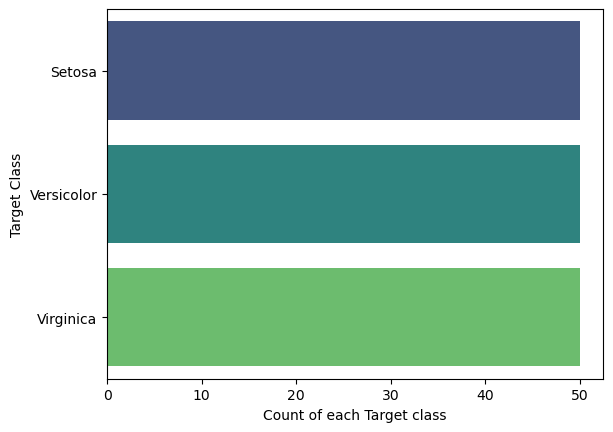

In [11]:
sns.countplot(y='variety',data=iris,palette='viridis')
plt.xlabel("Count of each Target class")
plt.ylabel("Target Class")
plt.show()

C:\Users\Sandesh Chavare\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


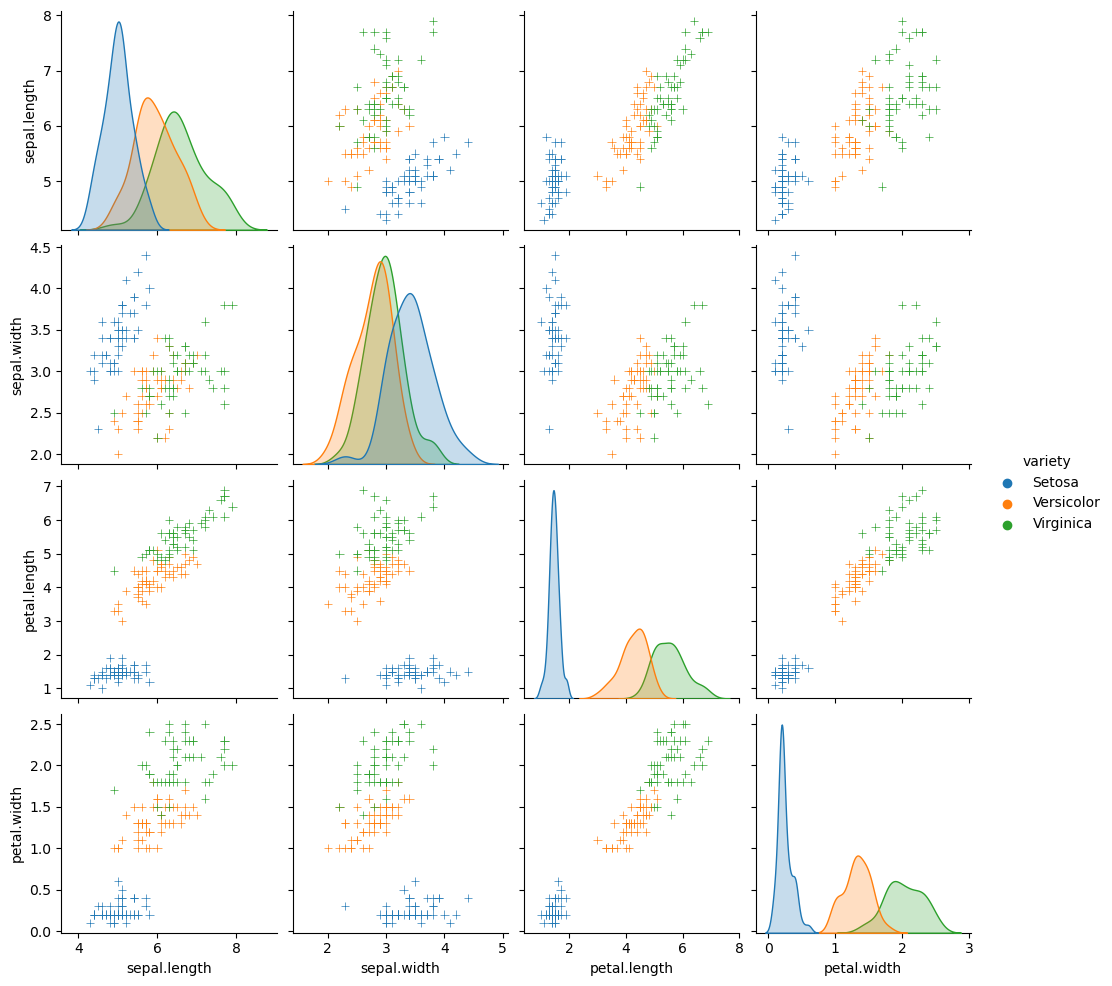

In [12]:
sns.pairplot(iris,hue='variety',markers='+')
plt.show()

In [13]:
X = iris.drop('variety',axis=1)
y = iris['variety']

In [14]:
print(f'X shape: {X.shape} | y shape: {y.shape}')

X shape: (150, 4) | y shape: (150,)


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=11,test_size=0.2)

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
predictions = knn.predict(X_test)

In [18]:
predictions[:5]

array(['Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Virginica'],
      dtype=object)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [20]:
print(accuracy_score(y_test,predictions))

0.9666666666666667


In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [22]:
print(confusion_matrix(y_test,predictions))

[[ 9  0  0]
 [ 0 10  0]
 [ 0  1 10]]
